In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tqdm import tqdm

In [3]:
import mctspy as mct

In [4]:
Sq = mct.structurefactors.hssPY(0.548)
qgrid = np.linspace(0.2,39.8,100)

In [5]:
model = mct.granular.granular_model(Sq,qgrid,restitution_coeff=0.5)

In [6]:
nep = mct.nonergodicity_parameter (model = model, maxiter=1500)
nep.solve()

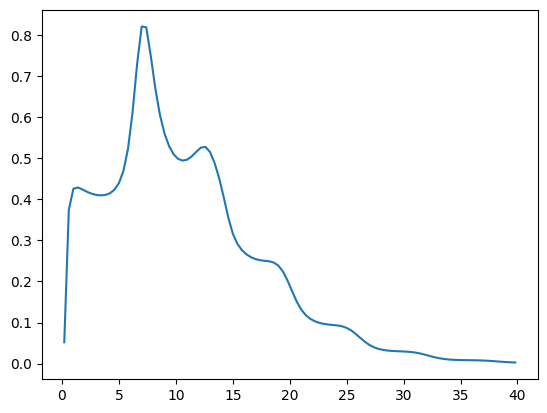

In [7]:
plt.plot(nep.model.q, nep.f)
plt.show()

In [8]:
def calc_ev(phi,eps):
    Sq = mct.structurefactors.hssPY(phi)
    model = mct.granular.granular_model (Sq, qgrid, restitution_coeff=eps)
    nep = mct.nonergodicity_parameter (model = model)
    nep.solve()
    ev = mct.eigenvalue(nep)
    ev.solve()
    return ev
epsrange = np.linspace(0,1,11)
phic = []
evals = []
for eps in epsrange:
    print("=== eps = {} ===".format(eps))
    phis, evs = mct.evscan(0.51,0.59,lambda phi:calc_ev(phi,eps),eps=1e-8)
    p=np.argmax([ev.eval for ev in evs])
    phic.append(phis[p])
    evals.append(evs[p])
phic = np.array(phic)

=== eps = 0.0 ===


=== eps = 0.1 ===


=== eps = 0.2 ===


=== eps = 0.30000000000000004 ===


=== eps = 0.4 ===


=== eps = 0.5 ===


=== eps = 0.6000000000000001 ===


=== eps = 0.7000000000000001 ===


=== eps = 0.8 ===


=== eps = 0.9 ===


=== eps = 1.0 ===


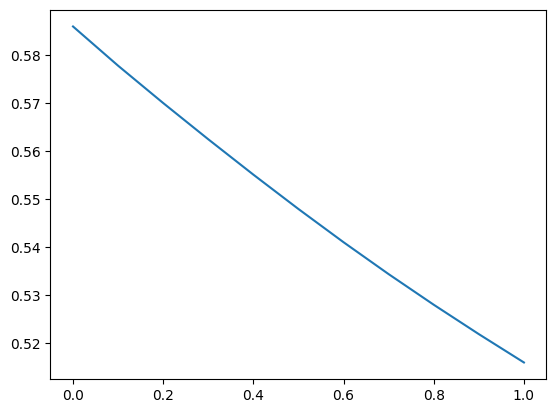

In [9]:
plt.plot(epsrange,phic)
plt.show()

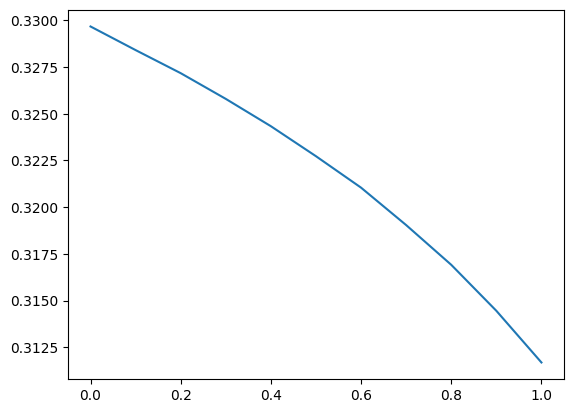

In [10]:
plt.plot(epsrange,[mct.exponents(ev.lam)[0] for ev in evals])
plt.show()

In [11]:
Sq = mct.structurefactors.hssPY(0.545)
model = mct.granular.granular_model(Sq,qgrid,restitution_coeff=0.5)
phi = mct.correlator (model = model, store=True)

adjusting to damped_newtonian dynamics


In [12]:
Sq0 = mct.structurefactors.hssPY(0.515)
model0 = mct.simple_liquid_model(Sq0,qgrid)
phi_bd = mct.correlator (model = model0, motion_type='brownian', store=True)
phi_nd = mct.correlator (model = model0, motion_type='newtonian', store=True)

In [13]:
correlators = mct.CorrelatorStack([phi,phi_bd,phi_nd])

In [14]:
pbar = tqdm(total=phi.blocks+1)
correlators.solve_all(callback=lambda d,bs2,bs,c: pbar.update(1))
pbar.close()

  0%|                                                    | 0/61 [00:00<?, ?it/s]

  2%|▋                                           | 1/61 [00:31<31:45, 31.75s/it]

  3%|█▍                                          | 2/61 [00:32<13:01, 13.24s/it]

  5%|██▏                                         | 3/61 [00:34<08:01,  8.30s/it]

  7%|██▉                                         | 4/61 [00:34<04:52,  5.13s/it]

  8%|███▌                                        | 5/61 [00:35<03:09,  3.39s/it]

 10%|████▎                                       | 6/61 [00:35<02:08,  2.34s/it]

 11%|█████                                       | 7/61 [00:35<01:29,  1.67s/it]

 13%|█████▊                                      | 8/61 [00:35<01:04,  1.23s/it]

 15%|██████▍                                     | 9/61 [00:36<00:50,  1.04it/s]

 16%|███████                                    | 10/61 [00:36<00:40,  1.27it/s]

 18%|███████▊                                   | 11/61 [00:37<00:33,  1.50it/s]

 20%|████████▍                                  | 12/61 [00:37<00:28,  1.73it/s]

 21%|█████████▏                                 | 13/61 [00:37<00:25,  1.87it/s]

 23%|█████████▊                                 | 14/61 [00:38<00:23,  1.98it/s]

 25%|██████████▌                                | 15/61 [00:38<00:22,  2.06it/s]

 26%|███████████▎                               | 16/61 [00:39<00:21,  2.10it/s]

 28%|███████████▉                               | 17/61 [00:39<00:20,  2.16it/s]

 30%|████████████▋                              | 18/61 [00:40<00:19,  2.20it/s]

 31%|█████████████▍                             | 19/61 [00:40<00:19,  2.14it/s]

 33%|██████████████                             | 20/61 [00:41<00:19,  2.09it/s]

 34%|██████████████▊                            | 21/61 [00:41<00:19,  2.01it/s]

 36%|███████████████▌                           | 22/61 [00:42<00:19,  1.96it/s]

 38%|████████████████▏                          | 23/61 [00:42<00:20,  1.85it/s]

 39%|████████████████▉                          | 24/61 [00:43<00:22,  1.64it/s]

 41%|█████████████████▌                         | 25/61 [00:44<00:24,  1.48it/s]

 43%|██████████████████▎                        | 26/61 [00:45<00:26,  1.33it/s]

 44%|███████████████████                        | 27/61 [00:46<00:28,  1.18it/s]

 46%|███████████████████▋                       | 28/61 [00:47<00:33,  1.01s/it]

 48%|████████████████████▍                      | 29/61 [00:49<00:39,  1.22s/it]

 49%|█████████████████████▏                     | 30/61 [00:51<00:45,  1.47s/it]

 51%|█████████████████████▊                     | 31/61 [00:54<00:55,  1.86s/it]

 52%|██████████████████████▌                    | 32/61 [00:57<01:06,  2.28s/it]

 54%|███████████████████████▎                   | 33/61 [01:00<01:10,  2.53s/it]

 56%|███████████████████████▉                   | 34/61 [01:03<01:10,  2.62s/it]

 57%|████████████████████████▋                  | 35/61 [01:06<01:13,  2.84s/it]

 59%|█████████████████████████▍                 | 36/61 [01:10<01:18,  3.13s/it]

 61%|██████████████████████████                 | 37/61 [01:14<01:20,  3.34s/it]

 62%|██████████████████████████▊                | 38/61 [01:17<01:13,  3.18s/it]

 64%|███████████████████████████▍               | 39/61 [01:18<00:59,  2.72s/it]

 66%|████████████████████████████▏              | 40/61 [01:20<00:48,  2.29s/it]

 67%|████████████████████████████▉              | 41/61 [01:21<00:38,  1.90s/it]

 69%|█████████████████████████████▌             | 42/61 [01:21<00:29,  1.54s/it]

 70%|██████████████████████████████▎            | 43/61 [01:22<00:23,  1.29s/it]

 72%|███████████████████████████████            | 44/61 [01:23<00:17,  1.05s/it]

 74%|███████████████████████████████▋           | 45/61 [01:23<00:14,  1.12it/s]

 75%|████████████████████████████████▍          | 46/61 [01:24<00:12,  1.22it/s]

 77%|█████████████████████████████████▏         | 47/61 [01:24<00:09,  1.46it/s]

 79%|█████████████████████████████████▊         | 48/61 [01:25<00:07,  1.70it/s]

 80%|██████████████████████████████████▌        | 49/61 [01:25<00:06,  1.92it/s]

 82%|███████████████████████████████████▏       | 50/61 [01:25<00:05,  2.12it/s]

 84%|███████████████████████████████████▉       | 51/61 [01:26<00:04,  2.42it/s]

 85%|████████████████████████████████████▋      | 52/61 [01:26<00:03,  2.70it/s]

 87%|█████████████████████████████████████▎     | 53/61 [01:26<00:02,  3.05it/s]

 89%|██████████████████████████████████████     | 54/61 [01:26<00:02,  3.36it/s]

 90%|██████████████████████████████████████▊    | 55/61 [01:26<00:01,  3.61it/s]

 92%|███████████████████████████████████████▍   | 56/61 [01:27<00:01,  3.81it/s]

 93%|████████████████████████████████████████▏  | 57/61 [01:27<00:00,  4.01it/s]

 95%|████████████████████████████████████████▉  | 58/61 [01:27<00:00,  3.59it/s]

 97%|█████████████████████████████████████████▌ | 59/61 [01:28<00:00,  3.20it/s]

 98%|██████████████████████████████████████████▎| 60/61 [01:28<00:00,  3.17it/s]

100%|███████████████████████████████████████████| 61/61 [01:28<00:00,  2.84it/s]

100%|███████████████████████████████████████████| 61/61 [01:28<00:00,  1.46s/it]

In [15]:
qvals = [4.2]
qis = np.array([np.nonzero(np.isclose(qgrid,qval)) for qval in qvals],dtype=int).reshape(-1)

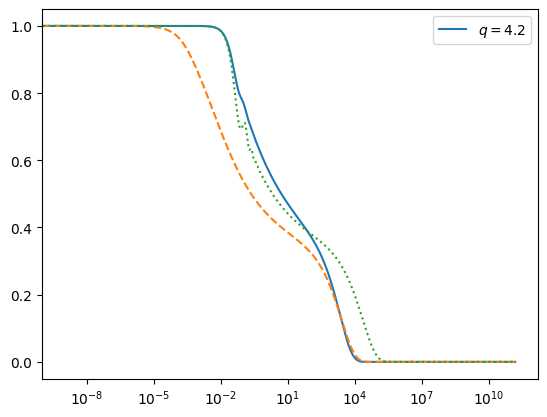

In [16]:
for qi in qis:
    plt.plot(phi.t, phi.phi[:,qi], label=r'$q = {:.1f}$'.format(qgrid[qi]))
    plt.plot(phi_bd.t,phi_bd.phi[:,qi],linestyle='dashed')
    plt.plot(phi_nd.t,phi_nd.phi[:,qi],linestyle='dotted')
plt.xscale('log')
plt.legend()
plt.show()

In [17]:
model_shear = mct.granular.gitt_model(Sq,qgrid,restitution_coeff=0.5,gammadot=1e-3)
phi_shear = mct.correlator (model = model_shear, store=True)

adjusting to damped_newtonian dynamics


In [18]:
pbar = tqdm(total=phi.blocks+1)
phi_shear.solve_all(callback=lambda d,bs2,bs,c: pbar.update(1))
pbar.close()

  0%|                                                    | 0/61 [00:00<?, ?it/s]

  2%|▋                                           | 1/61 [00:09<09:02,  9.04s/it]

  3%|█▍                                          | 2/61 [00:09<03:44,  3.80s/it]

  5%|██▏                                         | 3/61 [00:09<02:03,  2.13s/it]

  7%|██▉                                         | 4/61 [00:09<01:16,  1.34s/it]

  8%|███▌                                        | 5/61 [00:09<00:50,  1.10it/s]

 10%|████▎                                       | 6/61 [00:09<00:35,  1.55it/s]

 11%|█████                                       | 7/61 [00:09<00:26,  2.07it/s]

 13%|█████▊                                      | 8/61 [00:10<00:19,  2.67it/s]

 15%|██████▍                                     | 9/61 [00:10<00:17,  2.97it/s]

 16%|███████                                    | 10/61 [00:10<00:15,  3.24it/s]

 18%|███████▊                                   | 11/61 [00:10<00:14,  3.44it/s]

 20%|████████▍                                  | 12/61 [00:10<00:13,  3.63it/s]

 21%|█████████▏                                 | 13/61 [00:11<00:12,  3.75it/s]

 23%|█████████▊                                 | 14/61 [00:11<00:12,  3.86it/s]

 25%|██████████▌                                | 15/61 [00:11<00:11,  3.92it/s]

 26%|███████████▎                               | 16/61 [00:11<00:11,  3.88it/s]

 28%|███████████▉                               | 17/61 [00:12<00:11,  3.94it/s]

 30%|████████████▋                              | 18/61 [00:12<00:10,  3.99it/s]

 31%|█████████████▍                             | 19/61 [00:12<00:10,  4.00it/s]

 33%|██████████████                             | 20/61 [00:12<00:10,  4.03it/s]

 34%|██████████████▊                            | 21/61 [00:13<00:09,  4.02it/s]

 36%|███████████████▌                           | 22/61 [00:13<00:09,  3.97it/s]

 38%|████████████████▏                          | 23/61 [00:13<00:09,  3.96it/s]

 39%|████████████████▉                          | 24/61 [00:14<00:10,  3.38it/s]

 41%|█████████████████▌                         | 25/61 [00:14<00:11,  3.14it/s]

 43%|██████████████████▎                        | 26/61 [00:14<00:11,  2.99it/s]

 44%|███████████████████                        | 27/61 [00:15<00:12,  2.68it/s]

 46%|███████████████████▋                       | 28/61 [00:16<00:15,  2.08it/s]

 48%|████████████████████▍                      | 29/61 [00:16<00:19,  1.64it/s]

 49%|█████████████████████▏                     | 30/61 [00:18<00:22,  1.36it/s]

 51%|█████████████████████▊                     | 31/61 [00:19<00:25,  1.16it/s]

 52%|██████████████████████▌                    | 32/61 [00:20<00:29,  1.00s/it]

 54%|███████████████████████▎                   | 33/61 [00:21<00:29,  1.05s/it]

 56%|███████████████████████▉                   | 34/61 [00:22<00:26,  1.03it/s]

 57%|████████████████████████▋                  | 35/61 [00:23<00:22,  1.18it/s]

 59%|█████████████████████████▍                 | 36/61 [00:23<00:17,  1.44it/s]

 61%|██████████████████████████                 | 37/61 [00:23<00:13,  1.78it/s]

 62%|██████████████████████████▊                | 38/61 [00:23<00:10,  2.27it/s]

 64%|███████████████████████████▍               | 39/61 [00:23<00:07,  2.88it/s]

 66%|████████████████████████████▏              | 40/61 [00:23<00:05,  3.64it/s]

 67%|████████████████████████████▉              | 41/61 [00:24<00:04,  4.19it/s]

 69%|█████████████████████████████▌             | 42/61 [00:24<00:04,  4.69it/s]

 70%|██████████████████████████████▎            | 43/61 [00:24<00:03,  4.93it/s]

 72%|███████████████████████████████            | 44/61 [00:24<00:03,  5.62it/s]

 74%|███████████████████████████████▋           | 45/61 [00:24<00:02,  5.93it/s]

 75%|████████████████████████████████▍          | 46/61 [00:24<00:02,  6.69it/s]

 79%|█████████████████████████████████▊         | 48/61 [00:25<00:01,  8.44it/s]

 82%|███████████████████████████████████▏       | 50/61 [00:25<00:01,  9.47it/s]

 85%|████████████████████████████████████▋      | 52/61 [00:25<00:00, 10.21it/s]

 89%|██████████████████████████████████████     | 54/61 [00:25<00:00, 10.75it/s]

 92%|███████████████████████████████████████▍   | 56/61 [00:25<00:00, 11.07it/s]

 95%|████████████████████████████████████████▉  | 58/61 [00:25<00:00, 11.42it/s]

 98%|██████████████████████████████████████████▎| 60/61 [00:26<00:00, 11.56it/s]

100%|███████████████████████████████████████████| 61/61 [00:26<00:00,  2.34it/s]

In [19]:
G = phi_shear.shear_modulus()

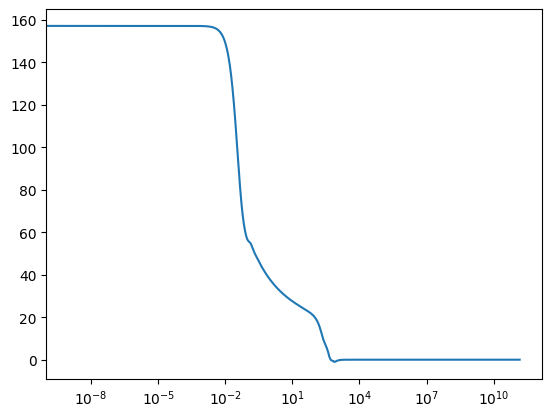

In [20]:
plt.plot(phi.t,G)
plt.xscale('log')
plt.show()